# Census Income Project

#### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).
#### The prediction task is to determine whether a person makes over $50K a year.


#### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df.shape

(32560, 15)

This dataset contains 32560 rows and 15 columns

In [4]:
#getting the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation :   
- We can see there are 2 different types of data (int and object) present in the dataset.  
- We can also see there are no null values present in the dataset.  
- Here "Income" is ue target/label which is of object type.

#### Data Integrity Check

In [5]:
df.duplicated().sum()

24

In [6]:
#dropping duplicated entry from dataset
df.drop_duplicates(keep='last', inplace=True)

In [7]:
#checking
df.duplicated().sum()

0

All duplicates has been removed.

In [8]:
#checking of question mark (" ?") inside dataset as we have seen in the file.
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [9]:
#Replacing ' ?' with np.NaN
df=df.replace(' ?',np.NaN)

In [10]:
#checking
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We have Replaced ' ?' with np.NaN

In [11]:
#checking if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

No whitespace, NA, '-' exist in dataset.

In [12]:
# checking for the missing values
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [13]:
# Imputating the Missing values
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [14]:
# checking again
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see all missing values has been removed from the dataset.

In [15]:
# Checking the Unique Values of Each Column
df.apply(pd.Series.unique)

Age               [50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 3...
Workclass         [ Self-emp-not-inc,  Private,  State-gov,  Fed...
Fnlwgt            [83311, 215646, 234721, 338409, 284582, 160187...
Education         [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
Education_num     [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...
Marital_status    [ Married-civ-spouse,  Divorced,  Married-spou...
Occupation        [ Exec-managerial,  Handlers-cleaners,  Prof-s...
Relationship      [ Husband,  Not-in-family,  Wife,  Own-child, ...
Race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
Sex                                                [ Male,  Female]
Capital_gain      [0, 14084, 5178, 5013, 2407, 14344, 15024, 768...
Capital_loss      [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, ...
Hours_per_week    [13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 4...
Native_country    [ United-States,  Cuba,  Jamaica,  India,  Mex...
Income                                          

- From above we can see the different unique values of each column.  
- Our label 'Income" has 2 types class. So binary classifiaction problem.

In [16]:
df.shape

(32536, 15)

### Seggregating numerical and categorical columns

In [17]:
#Checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Categorical Columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [18]:
#Checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:\n", num_col)

Numerical Columns:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


## Statistical analysis

In [19]:
#summary of the numerical dataset
df.describe().round(3)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000,32536.000,32536.000,32536.000,32536.000,32536.000
mean,38.586,189784.299,10.082,1078.410,87.371,40.440
std,13.638,105556.258,2.572,7388.068,403.108,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117831.500,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,236993.250,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


#### Observations :
- The counts of all the columns are same i.e,32536 which means there are no missing values present in it.
- The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within data.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

## Data Visualization

### Visualization of Categorical columns

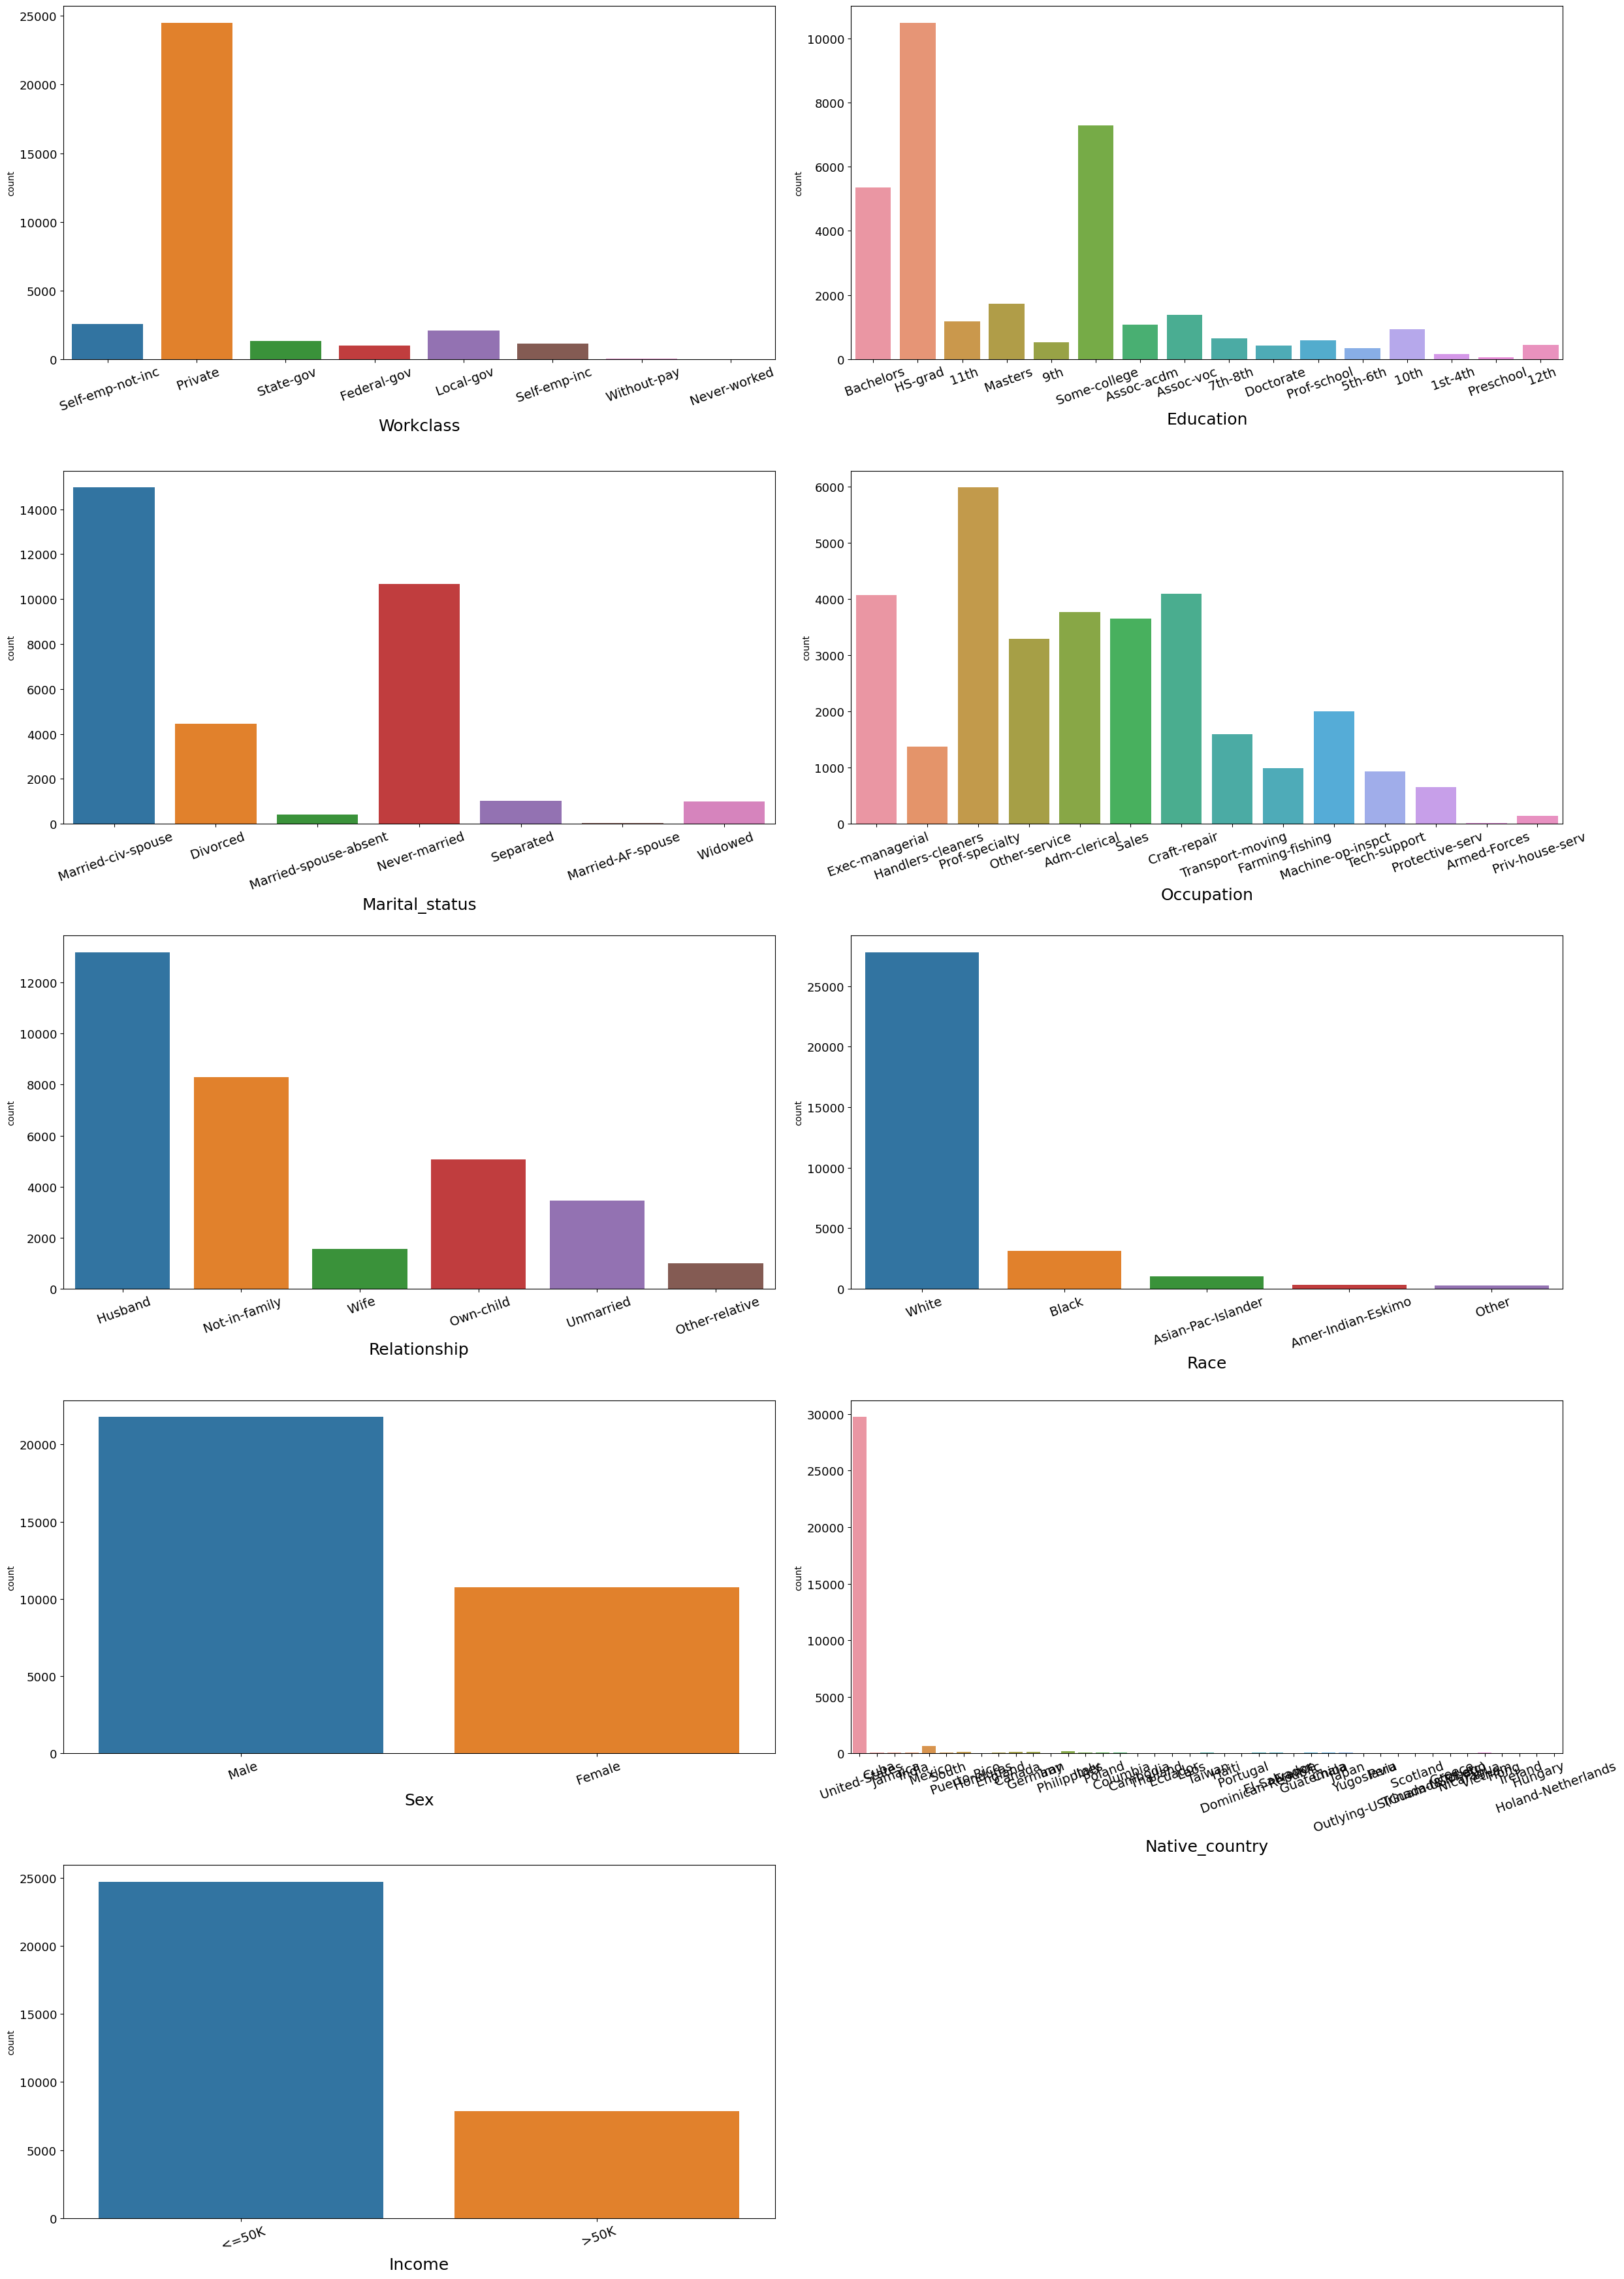

In [27]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 9:
        ax=plt.subplot(5,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=18)
        plt.xticks(fontsize=14,rotation=20)
        plt.yticks(fontsize=13)
    plotnumber+=1
plt.tight_layout()

#### From the above graphs we can observe the followings :
- In the Work Class column the highest number of people work for private sector.
- In the Education column the highest number of values in HS grad followed by Some college and Bachelors.
- In the Marital Status column married spouses are higher followed by never married people and then divocedon.
- The Occupation column has various categories out of which people in Armed Forces are the least and people engaged in some craft repair, executive managers and holding some professional speciality are on the rise.
- In the "Relationship" status the values for husband is the highest follwed by not-in-family and other relative is lowest.
- The Race column mostly comprises of White people in the dataset cpmpared to other attributes.
- In the sex column, the number of data values for male is higher than that of it's female counterparts.
- The Native Country column has the highest value for United-States while the remaining categories has neligible amount of data.
- The target label "Income" column has imbalaned dataset that will need to be taken care of before we start building our classification machine learning model.

## Bivariate Analysis

### Visualizing the relationship between the features and target

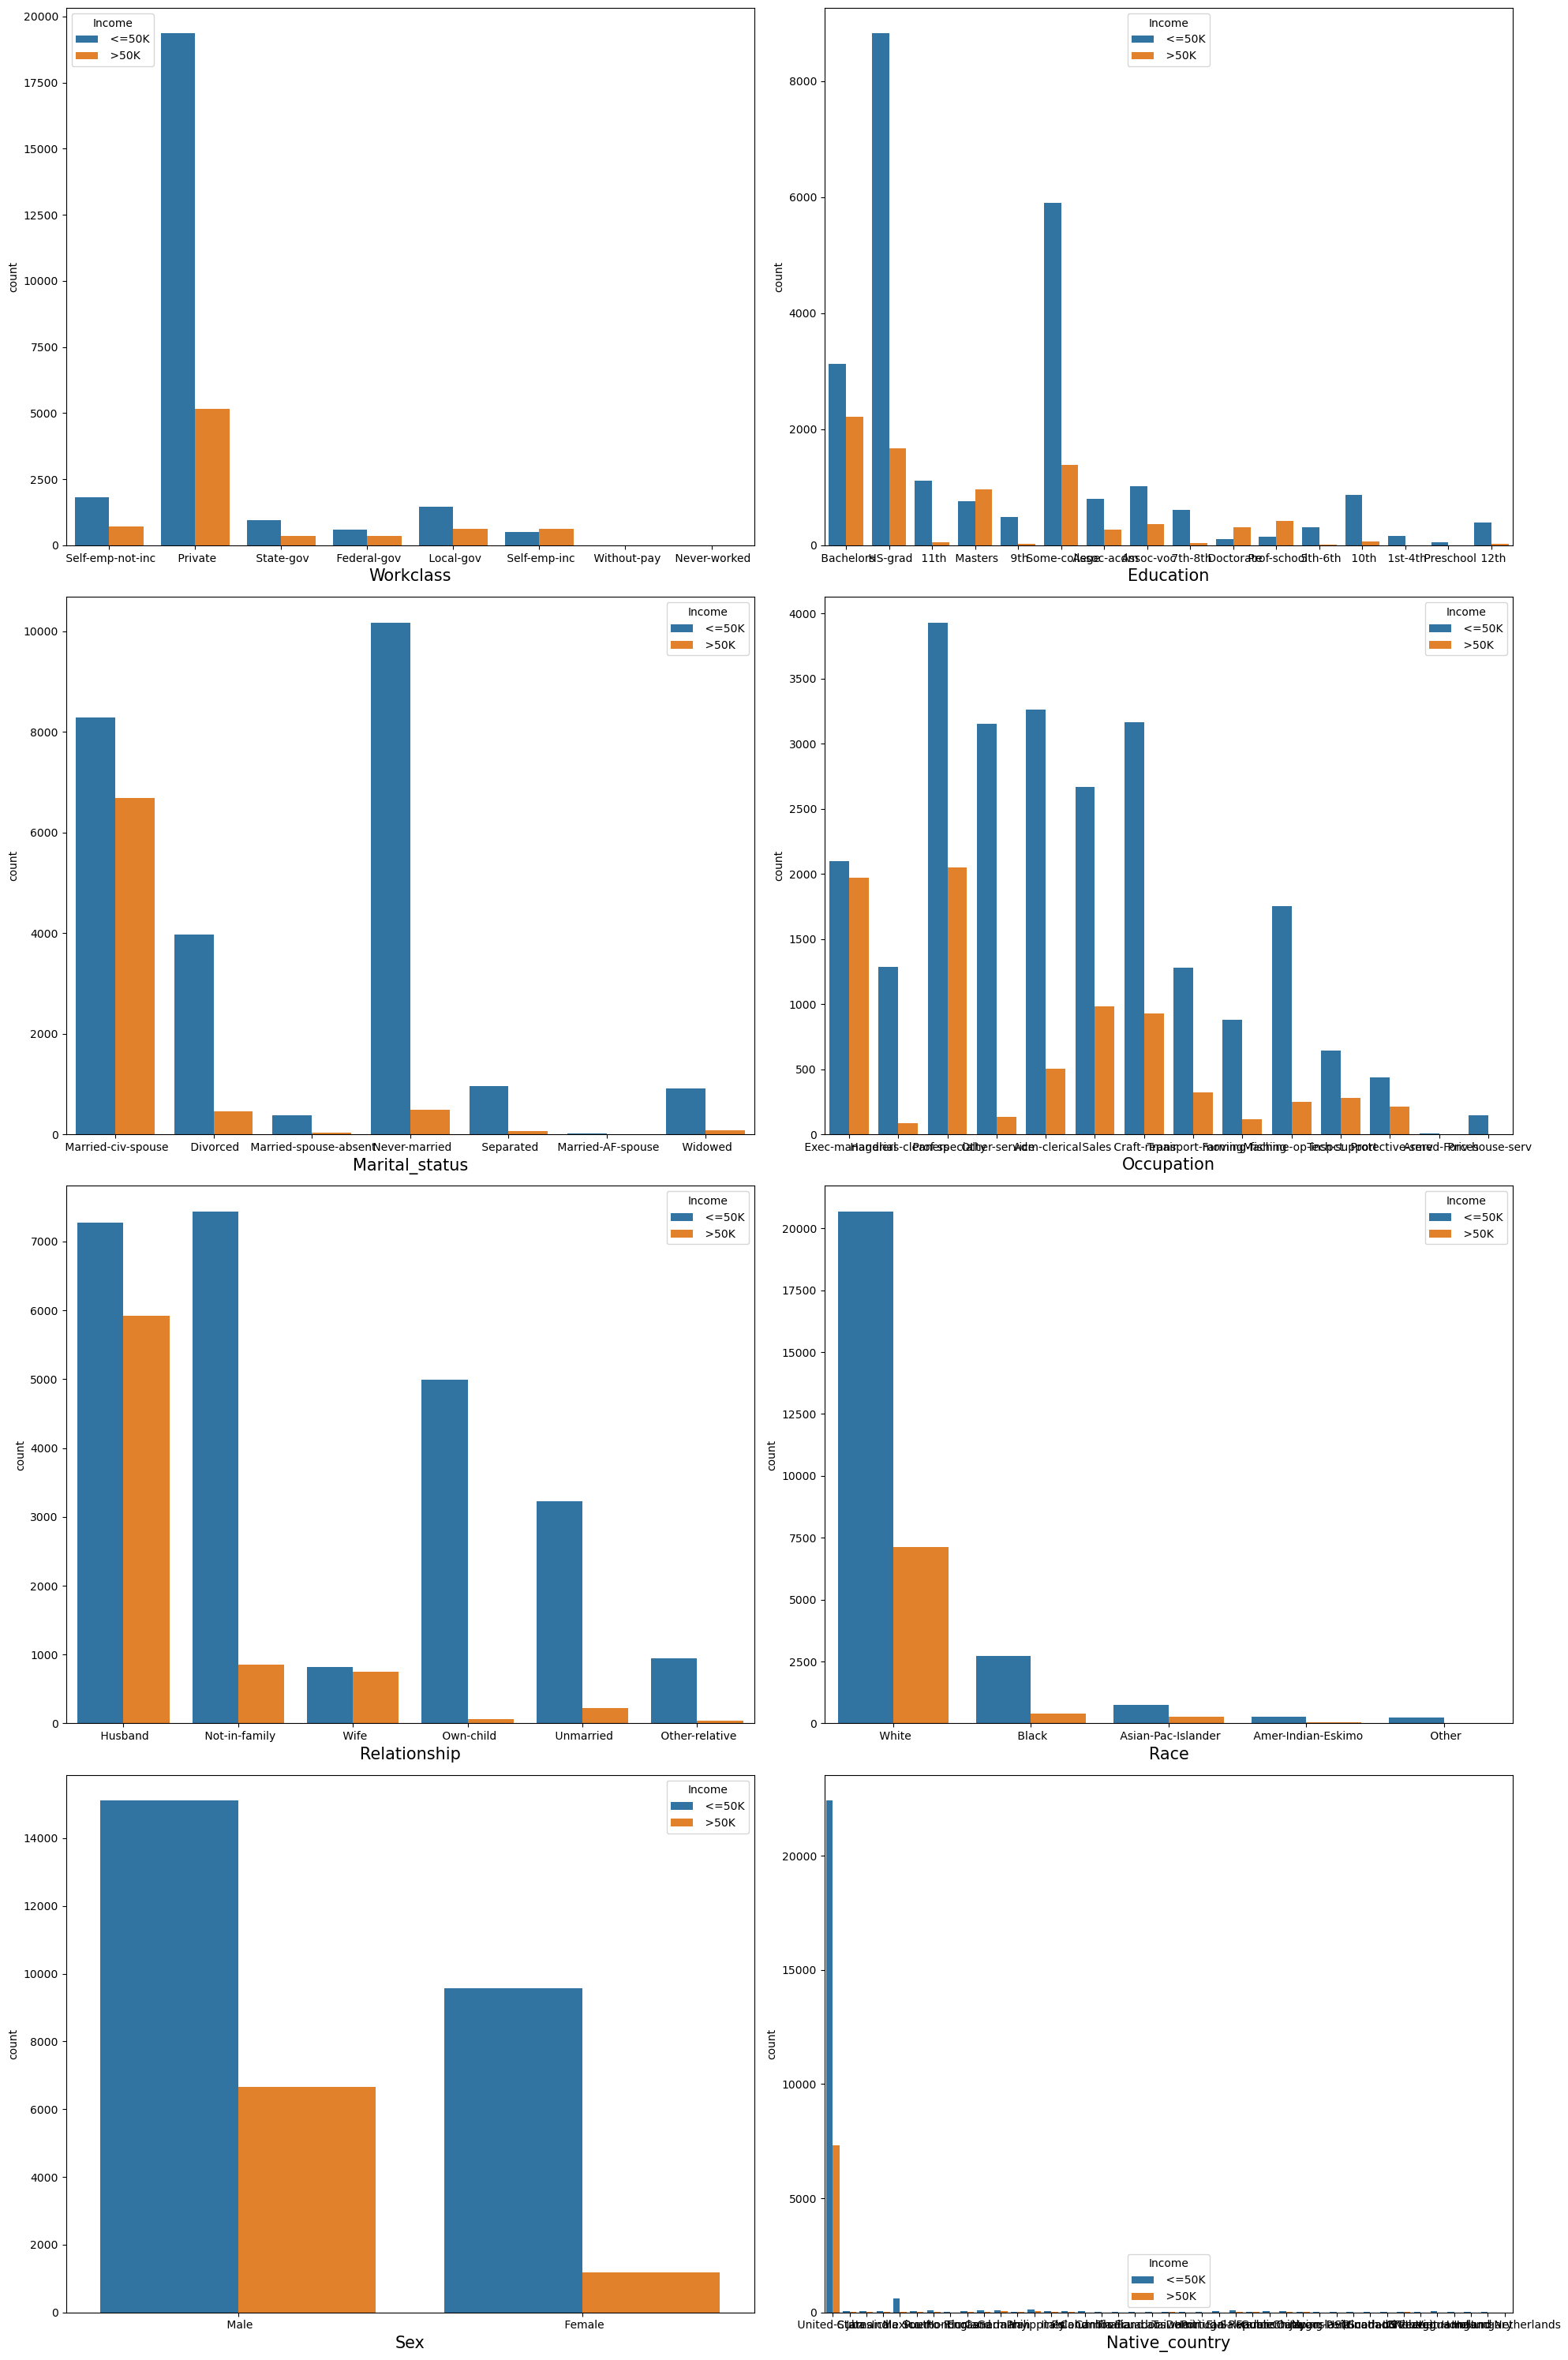

In [33]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 8:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(df[column],hue=df["Income"])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### Observations: 
- In the Work Class column which comprises of most private employees who are earning less(<=50k) compared to high income(>50k).
- In the Education column which has highest number of values in HS grad are earning less(<=50k) whereas people having masters and doctrate earns more(>50k).
- In the Marital Status column married spouses are earning less in few nos to 50k and the people who never married are earning less(<=50 ) and the people who are divorced or separated are more likely to earns less i.e, <=50k.
- In the Occupation column, the exec-managerial people earns almost eqal in both the ranges while in other occupation people are earning less i.e <=50k.
- In the Relationship status the income of husbands below 50k is little more than above 50k and the wifes income are equally in the range while other groups are earning less.
- The Race column which mostly comprises of White people income is quite less <50k.
- In sex column both male and female income is below 50k than abobe 50k.
- In the Native Country column which has the highest people from United-States have less income(<=50k) than above 50k.

### Data Distribution Analysis by Visualization of Numerical columns

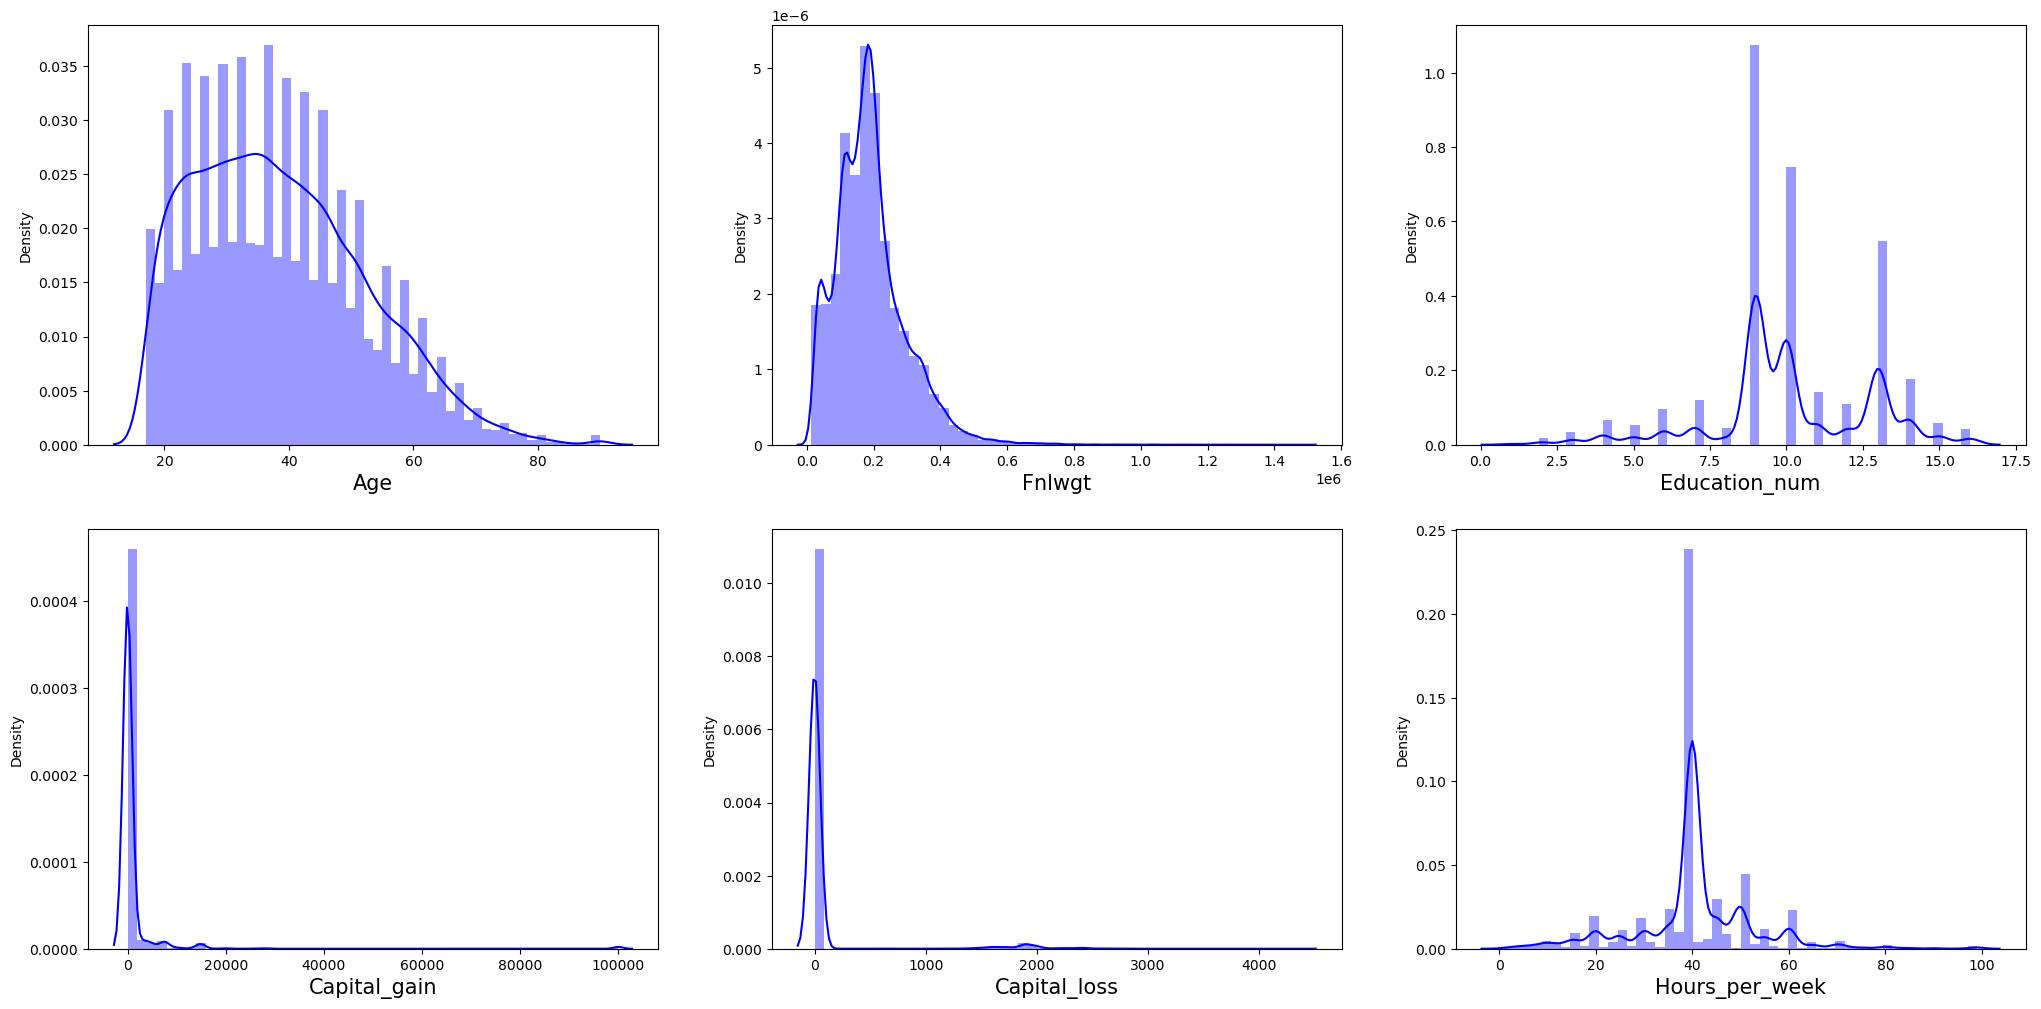

In [34]:
plt.figure(figsize=(25,12),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From the above distribution plot we can see the distribution of data in columns.It is observed that the data is not normally distributed in some columns which suggest presence of outliers.We will investigate further using boxplot.

### Visualizing the outliers using boxplot

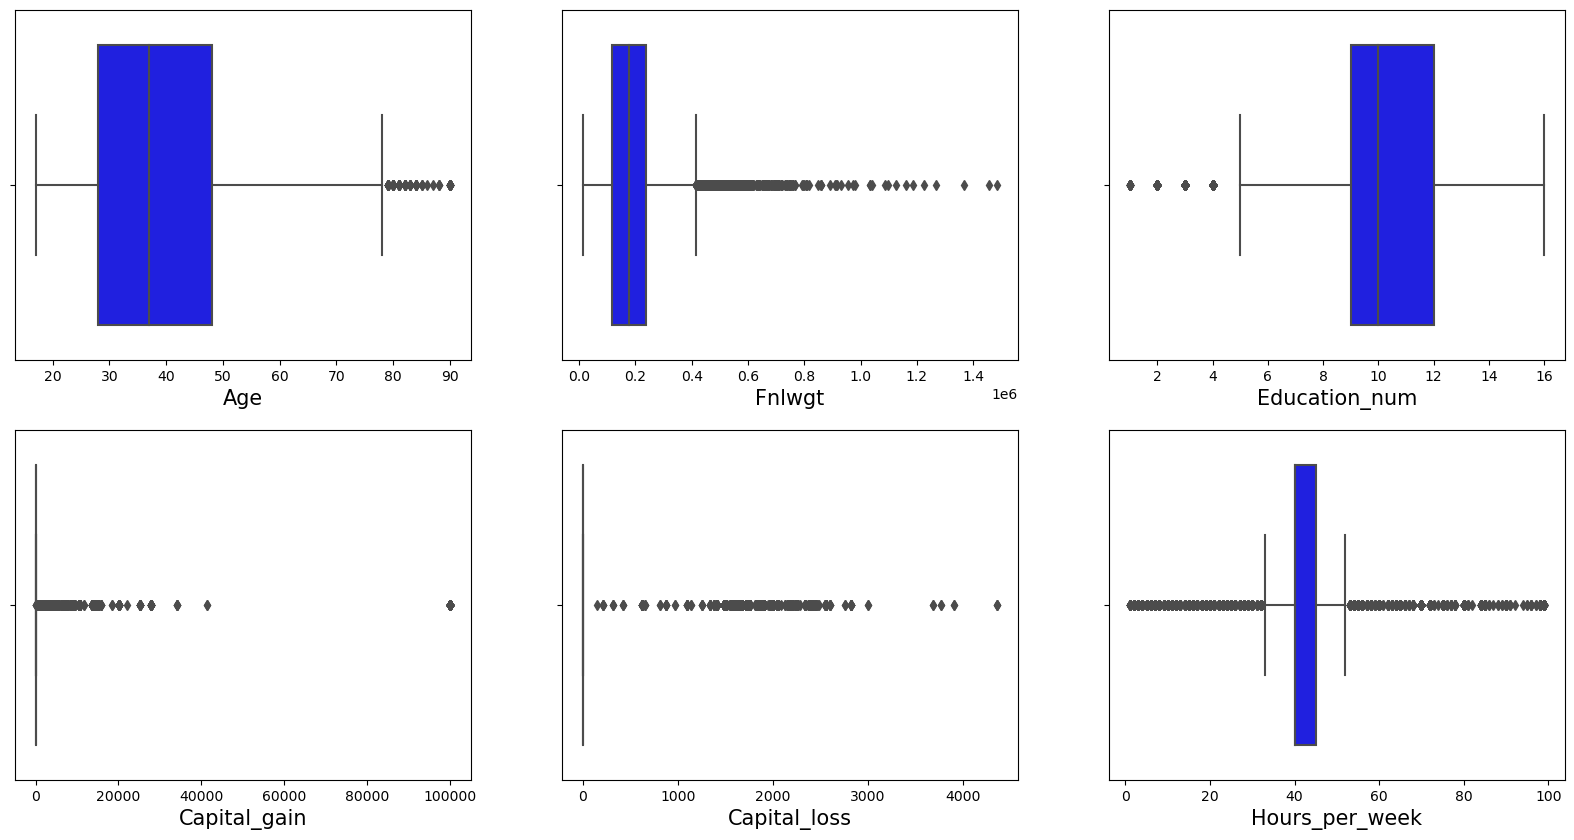

In [35]:
plt.figure(figsize=(20,10),facecolor='white')
graph=1
for column in num_col:
    if graph <= 6:
        ax=plt.subplot(2,3,graph)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In the boxplot we can notice the outliers present in all the columns.    
Let's remove outliers from the columns using Zscore method.

### Removing outliers using z-score method

In [36]:
from scipy.stats import zscore
z=zscore(df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])
abs_z=np.abs(z)
df=df[(abs_z<3).all(axis=1)]  #3-std deviation data
df.shape

(29808, 15)

Before the size was (32536, 15).

### Encoding the categorical columns

In [37]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,0,0,13,37,0
1,38,3,215646,10,9,0,5,1,4,1,0,0,40,37,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,37,0
3,28,3,338409,8,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,0,0,40,37,0


### Correlation matrix using HeatMap

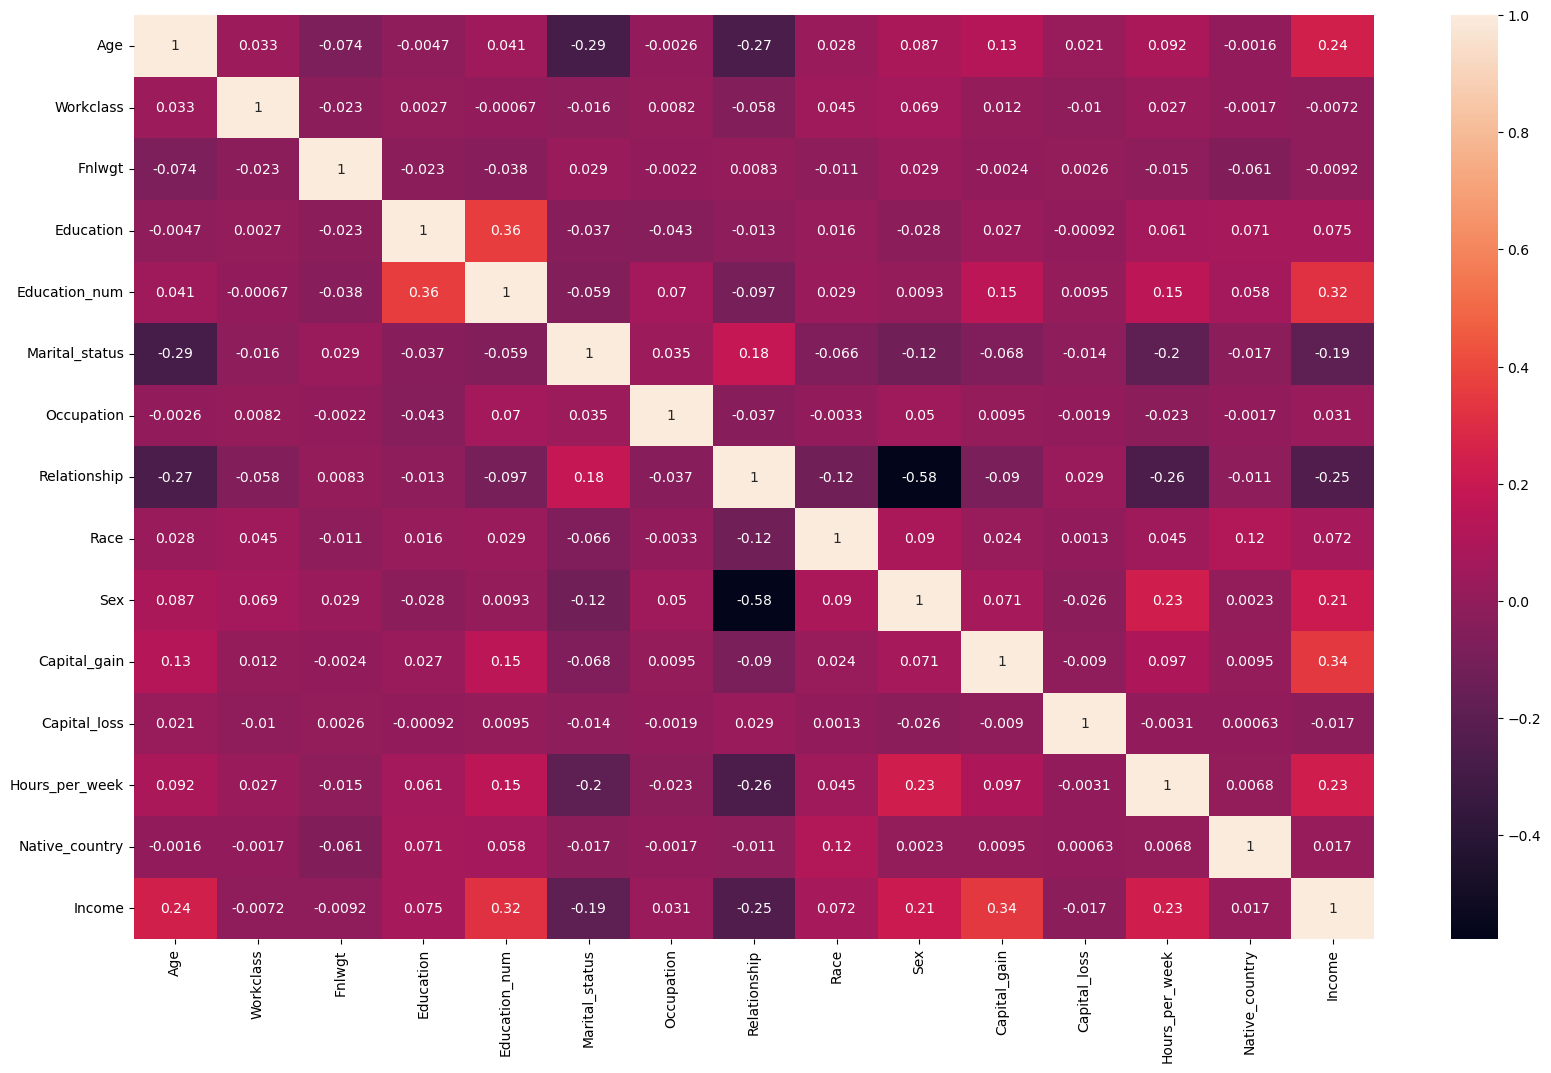

In [39]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the correlation matrix, we can see the co-relation between all the features and the features and targets.
- Columns Age,Education,Education_num,Occupation,race,sex,Capital_gain,Hours_per_week and Native_Country are positively correlated with the target.
- Columns Work_class,Fnlwgt,Marital_status,Relationship and Capital_loss are negatively correlated with the target.
- The target column Loan_Status is highly positively correlated with the feature Credit_History.

### Visualizing the correlation between label and features using plot

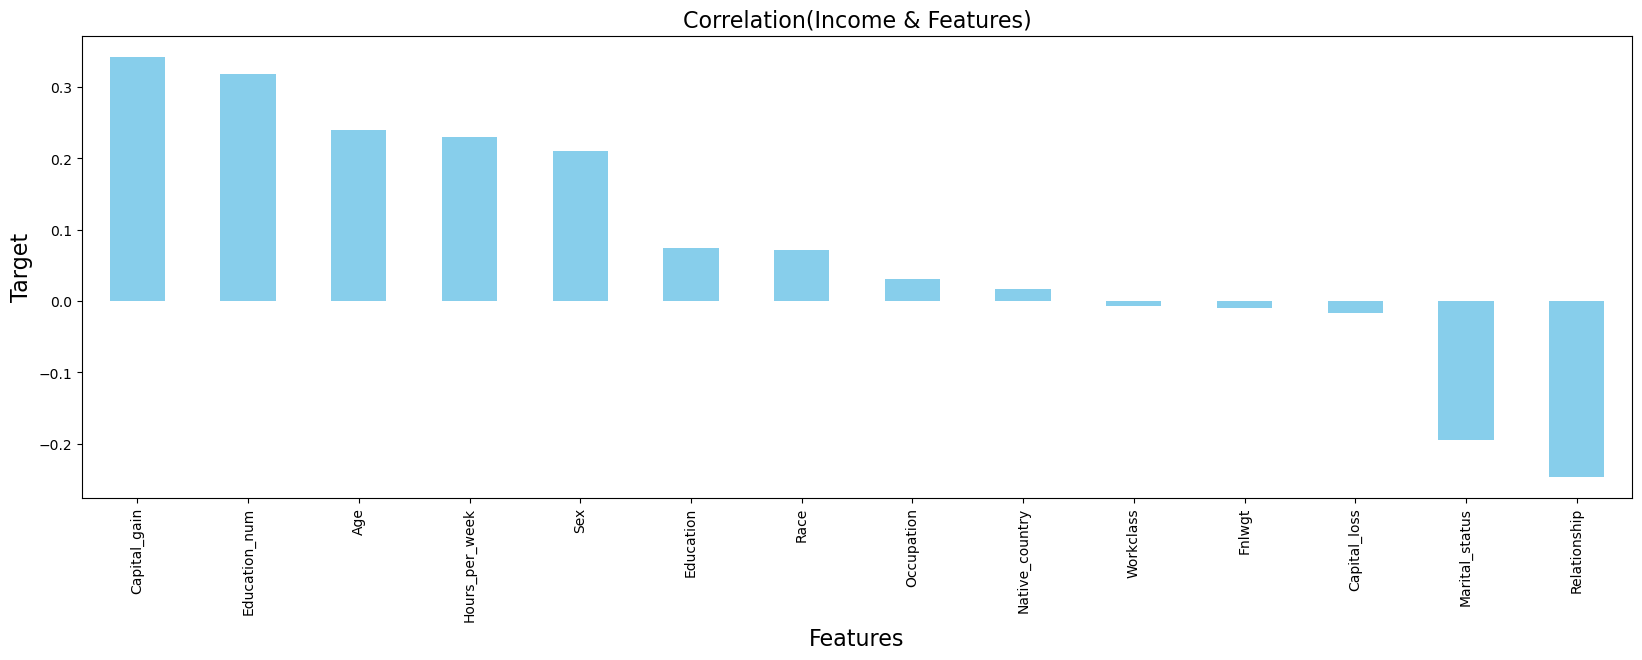

In [41]:
# visualization of target "Income" with other features in plots
plt.figure(figsize =(20, 6))
df.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation(Income & Features)',fontsize=16)
plt.show()

### Separating the features and target

In [42]:
x = df.drop(['Income'],axis=1)  #Features
y = df['Income']   #Target

### Data Scaling using Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [45]:
x1.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887304,1.732583,-1.077578,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.244524,-0.036984,-2.415235,0.25725
1,-0.011046,-0.078182,0.321940,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.244524,-0.036984,0.009070,0.25725


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,1.178766,Age
1,1.008009,Workclass
2,1.012586,Fnlwgt
3,1.162797,Education
4,1.219347,Education_num
5,1.137184,Marital_status
6,1.016332,Occupation
7,1.672657,Relationship
8,1.032518,Race
9,1.550116,Sex


From the above we can see there is no multicolinearity issue here(all vif_values<10).

In [47]:
#checking of class imbalance of target variable
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

Here we can see the target class is imbalance.we need to balance it.

### Oversampling data using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x1,y)

In [49]:
#Now checking value count of target column
y1.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

Now the data is balanced.So there is no class imbalance.

### Splitting the dataset in Train and Test Set

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=42)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Classification)

In [55]:
#Importing necessary libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

### Decision Tree Classifier

In [53]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 86%
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4594
           1       0.86      0.87      0.87      4669

    accuracy                           0.86      9263
   macro avg       0.86      0.86      0.86      9263
weighted avg       0.86      0.86      0.86      9263

Cross Validation Score: 0.8110237622484201
Difference between Accuracy Score and Cross Validation Score is 0.05381484295507766


### Logistic Regression

In [57]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [58]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 76%
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      4594
           1       0.76      0.77      0.76      4669

    accuracy                           0.76      9263
   macro avg       0.76      0.76      0.76      9263
weighted avg       0.76      0.76      0.76      9263

Cross Validation Score: 0.7959274307937296
Difference between Accuracy Score and Cross Validation Score is -0.03494286855687334


### Random Forest Classifier

In [59]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 91%
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4594
           1       0.90      0.92      0.91      4669

    accuracy                           0.91      9263
   macro avg       0.91      0.91      0.91      9263
weighted avg       0.91      0.91      0.91      9263

Cross Validation Score: 0.8534289498085537
Difference between Accuracy Score and Cross Validation Score is 0.054700166028648134


### XGBoost Classifier

In [61]:
Model4 = XGBClassifier()
Model4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
pred = Model4.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model4, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 90%
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      4594
           1       0.90      0.91      0.90      4669

    accuracy                           0.90      9263
   macro avg       0.90      0.90      0.90      9263
weighted avg       0.90      0.90      0.90      9263

Cross Validation Score: 0.8639629412719071
Difference between Accuracy Score and Cross Validation Score is 0.03887631166990446


We can see all models are working well but I am taking Random Forest Classifier as our final model as it shows 91% accuracy and all other scores are also good. 

### Hyper Parameter Tuning

In [63]:
#Random Forest Classifier

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [64]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [65]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [66]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [67]:
Final_model=RandomForestClassifier(criterion = 'gini',max_depth = 15,min_samples_leaf = 5,min_samples_split = 10,n_estimators = 30)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 88%


In [68]:
# Cross Validation Score
cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.8606416041741971
Difference between Accuracy Score and Cross Validation Score is 0.015316508748182245


Now we can see the Accuracy Score and the Cross Validation Score is almost equal.So we minimize the error.

### ROC AUC Curve

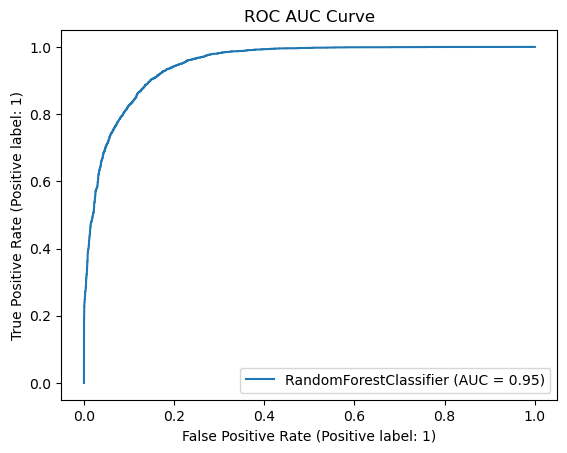

In [69]:
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

ROC Curve generated for final model and it shows the AUC score for final model is of 95%.

### Saving the model

In [70]:
import joblib
joblib.dump(Final_model,"Census Income Project analysis.pkl")

['Census Income Project analysis.pkl']

Finally saved the best classification model for Census Income Project analysis.